In [1]:
# Import the useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset

data=pd.read_csv(r"C:\Users\BLACK LION\Desktop\Atul\training.1600000.processed.noemoticon.csv",encoding='latin',header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Give names to columns

data.columns=['Sentiment','Id','Date','Flag','User_Id','Tweets']
data

,Sentiment,Id,Date,Flag,User_Id,Tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
# Check size of the data

data.shape

(1600000, 6)

In [5]:
# Check the information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User_Id    1600000 non-null  object
 5   Tweets     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Data preprocessing

In [6]:
# Check the missing values if any

data.isnull().any()

Sentiment    False
Id           False
Date         False
Flag         False
User_Id      False
Tweets       False
dtype: bool

In [7]:
data1=data.drop(columns=['Id','Date','Flag','User_Id'])
data1.head()

,Sentiment,Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
# Count the sentiments
data1['Sentiment'].value_counts()

0    800000
4    800000
Name: Sentiment, dtype: int64

array([[<AxesSubplot: title={'center': 'Sentiment'}>]], dtype=object)

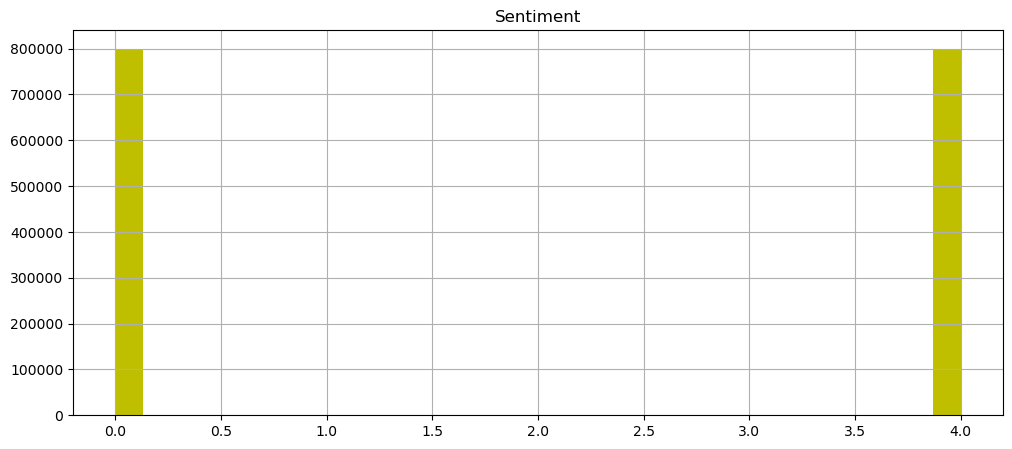

In [9]:
data1.hist(bins=30,figsize=(12,5),color="y")

In [10]:
data1['Length']=data1['Tweets'].apply(len)
data1

,Sentiment,Tweets,Length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,56
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,65


<AxesSubplot: ylabel='Frequency'>

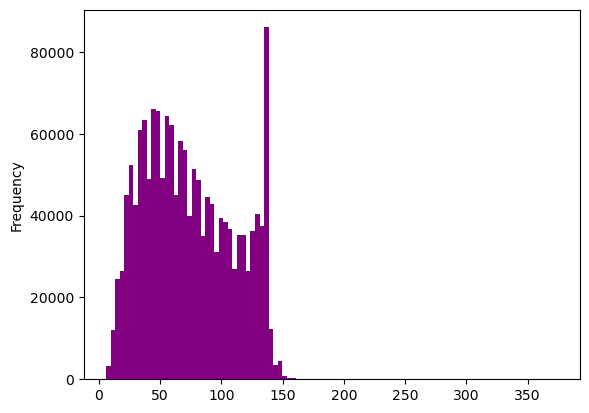

In [11]:
data1['Length'].plot(bins=100,kind='hist',color='purple')

In [12]:
# to display the first review 

data1['Tweets'][1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [13]:
data1['Clean_Tweets'] = data1['Tweets'].str.lower().str.replace('[^a-z\']', " ")

In [14]:
data1['Clean_Tweets']

0           switchfoot http   twitpic com  y zl   awww  t...
1          is upset that he can't update his facebook by ...
2           kenichan i dived many times for the ball  man...
3            my whole body feels itchy and like its on fire 
4           nationwideclass no  it's not behaving at all ...
                                 ...                        
1599995    just woke up  having no school is the best fee...
1599996    thewdb com   very cool to hear old walt interv...
1599997    are you ready for your mojo makeover  ask me f...
1599998    happy   th birthday to my boo of alll time    ...
1599999    happy  charitytuesday  thenspcc  sparkscharity...
Name: Clean_Tweets, Length: 1600000, dtype: object

In [15]:
data1

,Sentiment,Tweets,Length,Clean_Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com y zl awww t...
1,0,is upset that he can't update his Facebook by ...,111,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan i dived many times for the ball man...
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass no it's not behaving at all ...
...,...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,56,just woke up having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,78,thewdb com very cool to hear old walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,57,are you ready for your mojo makeover ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,65,happy th birthday to my boo of alll time ...


In [16]:
# now we have to remove the stopwords 

from nltk.corpus import stopwords
stop_list = stopwords.words('english')       # the stopwords from nltk library 
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# we have to add some commmon words to stopwords
stop_list.extend(['amazon','flipkart','twitter','facebook','google'])
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# write a user defined function to remove the stopwords. 

def sw(x):
    x = [word_list for word_list in x.split() if word_list not in stop_list]
    return " ".join(x)

In [19]:
data1.head()

,Sentiment,Tweets,Length,Clean_Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com y zl awww t...
1,0,is upset that he can't update his Facebook by ...,111,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan i dived many times for the ball man...
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass no it's not behaving at all ...


In [20]:
# we will apply our user defined function to clean_text and name it as split_text

In [21]:
data1['Split_Tweets'] = data1['Clean_Tweets'].apply(sw)
data1.head()

,Sentiment,Tweets,Length,Clean_Tweets,Split_Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com y zl awww t...,switchfoot http twitpic com zl awww that's bum...
1,0,is upset that he can't update his Facebook by ...,111,is upset that he can't update his facebook by ...,upset can't update texting might cry result sc...
2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan i dived many times for the ball man...,kenichan dived many times ball managed save re...
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass no it's not behaving at all ...,nationwideclass behaving i'm mad can't see


In [22]:
data1.tail()

,Sentiment,Tweets,Length,Clean_Tweets,Split_Tweets
1599995,4,Just woke up. Having no school is the best fee...,56,just woke up having no school is the best fee...,woke school best feeling ever
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,78,thewdb com very cool to hear old walt interv...,thewdb com cool hear old walt interviews http ...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,57,are you ready for your mojo makeover ask me f...,ready mojo makeover ask details
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,65,happy th birthday to my boo of alll time ...,happy th birthday boo alll time tupac amaru sh...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...,62,happy charitytuesday thenspcc sparkscharity...,happy charitytuesday thenspcc sparkscharity sp...


In [23]:
# Replacing integer data with sting
data1['Sentiment']=data1['Sentiment'].replace({0:'Negative',4:'Positive'})

## EDA

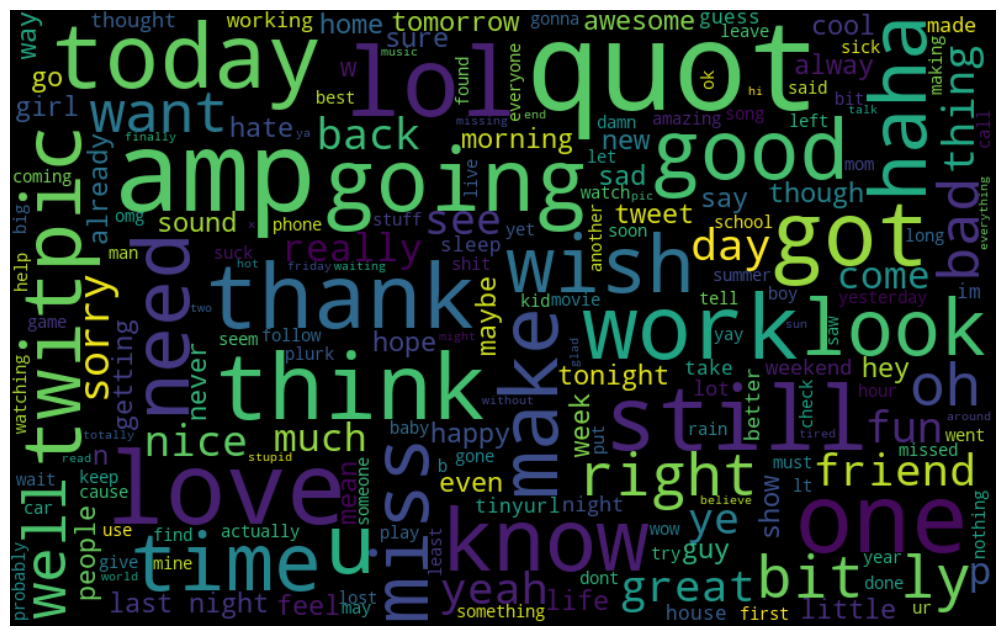

In [24]:
# Visualize the frequent words

all_words="".join([sentence for sentence in data1['Split_Tweets']] )

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

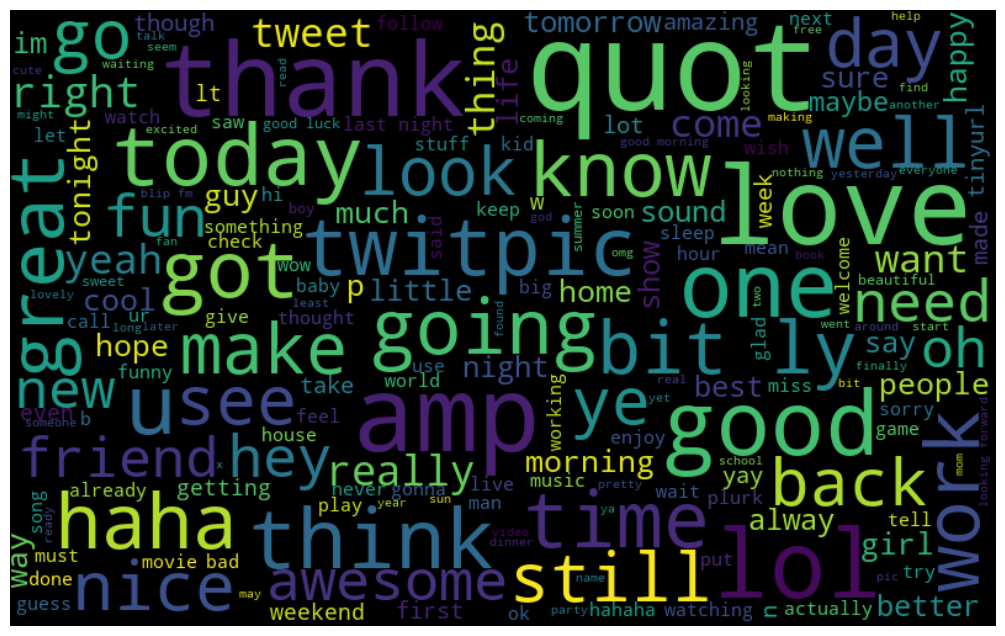

In [25]:
# Visualize the frequent words +ve sentences

all_words="".join([sentence for sentence in data1['Split_Tweets'][data1['Sentiment']=='Positive']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

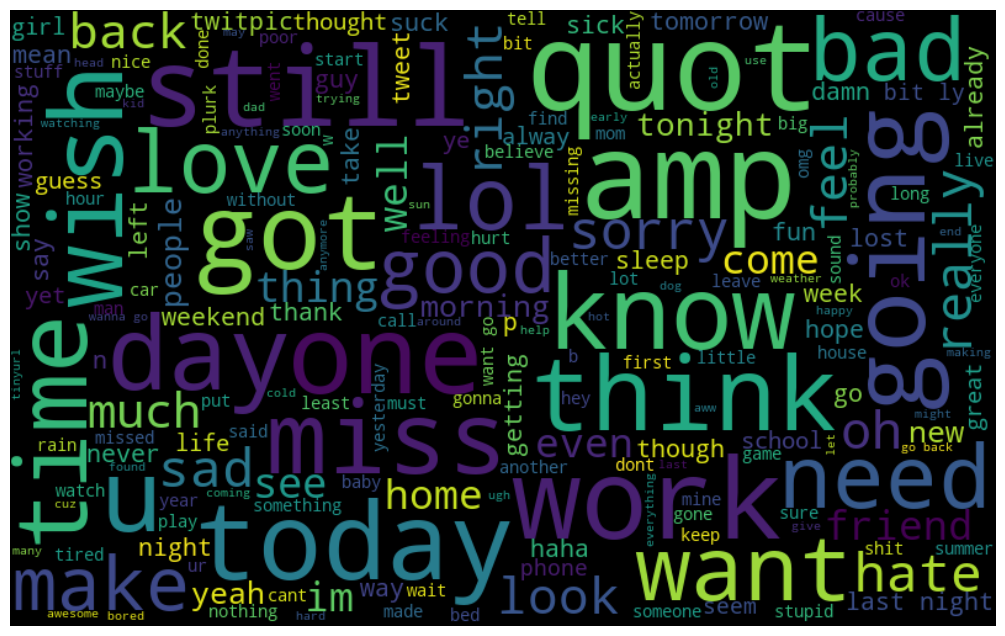

In [26]:
# Visualize the frequent words for negative sentences

all_words="".join([sentence for sentence in data1['Split_Tweets'][data1['Sentiment']=='Negative']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
data1['Sentiment']=data1['Sentiment'].replace({'Negative':0,'Positive':1})
X=data1.Split_Tweets
y=data1.Sentiment
print(X.tail())
print(y.tail())

1599995                        woke school best feeling ever
1599996    thewdb com cool hear old walt interviews http ...
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: Split_Tweets, dtype: object
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: Sentiment, dtype: int64


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =42)

In [30]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1280000, 320000, 1280000, 320000)

In [31]:
# Fit the TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


In [32]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [33]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78    159494
           1       0.78      0.79      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



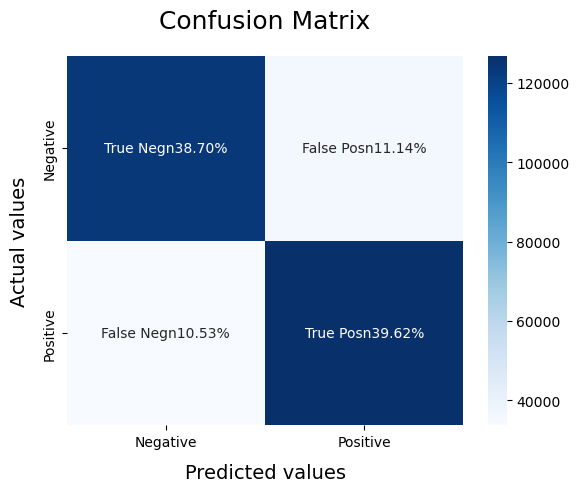

In [34]:
# Model-1

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

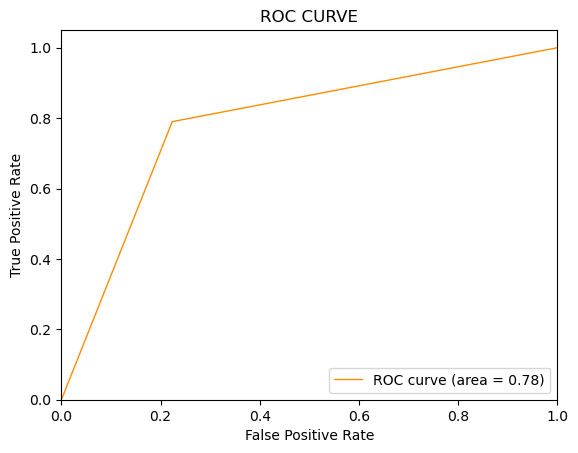

In [35]:
# Plot the ROC-AUC Curve for model-1

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



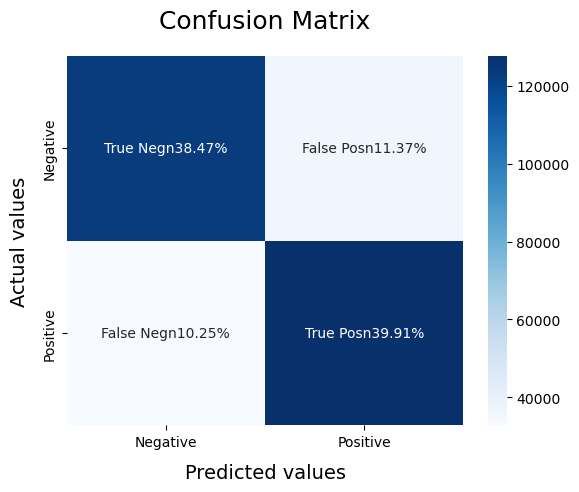

In [36]:
# Model-2

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

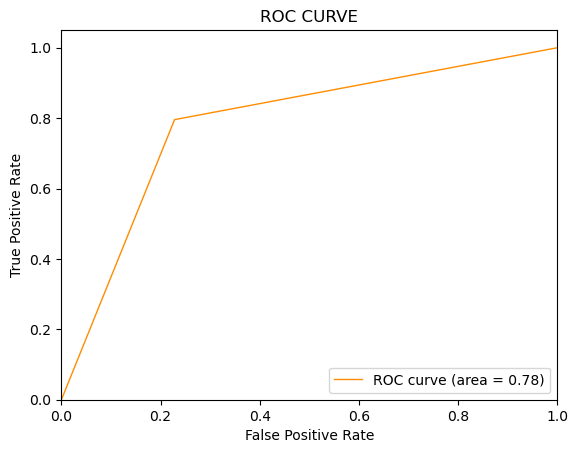

In [37]:
# Plot the ROC-AUC Curve for model-2

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



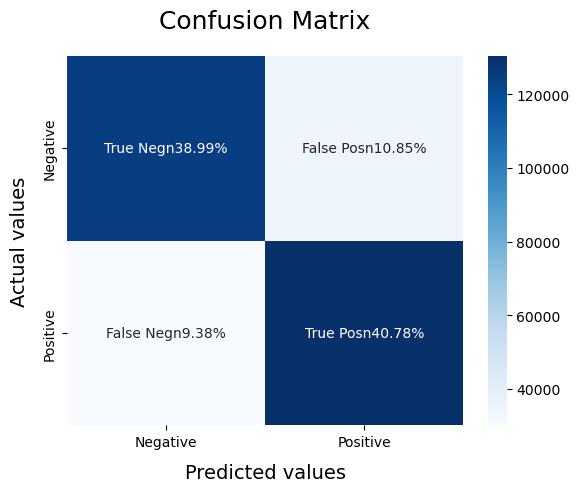

In [38]:
# Model-3

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

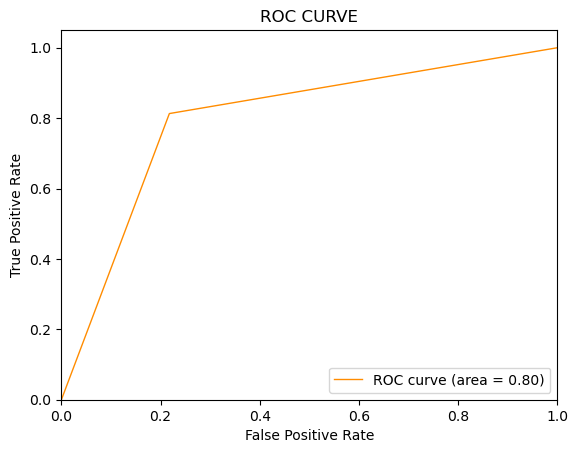

In [39]:
# Plot the ROC-AUC Curve for model-3
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Model Evalution

Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

F1-score: The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.78) = SVM (accuracy =0.78) < Logistic Regression (accuracy = 0.79)
(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.79) = SVM (accuracy = 0.79) < Logistic Regression (accuracy = 0.80)

AUC Score: For all three models Logistic Regression have the greater ROC-AUC score.

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.